In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


file_path = "/content/drive/MyDrive/Dataset Skripsi/Hasil_Tes_Atlet_Porda.csv"
data = pd.read_csv(file_path, delimiter=";", encoding="utf-8")



# **Preprocessing**

# Konversi Format Data

In [2]:
columns_to_convert = [
    'Kelentukan', 'Kelincahan', 'Kecepatan', 'Hand Grip kanan',
    'Hand Grip Kiri', 'Vo2 max', 'Berat Badan', 'Power Otot Tungkai'
]

# Konversi ke tipe numerik dengan pembersihan
for col in columns_to_convert:
   data[col] =data[col].astype(str).str.replace(',', '.', regex=True)  # Ganti koma ke titik
   data[col] =data[col].str.replace(r'[^0-9.]', '', regex=True)  # Hapus karakter selain angka dan titik
   data[col] = pd.to_numeric(data[col], errors='coerce')  # Konversi ke float, NaN jika gagal
   data[col] =data[col].fillna(0).astype(int)  # Isi NaN dengan 0 sebelum ubah ke int

data['Usia'] =data['Usia'].round().astype(int)
print(data.dtypes)

index                   int64
Gender                 object
Kelompok               object
Berat Badan             int64
Usia                    int64
Vo2 max                 int64
Power Otot Tungkai      int64
Kecepatan Reaksi      float64
Kelentukan              int64
Kelincahan              int64
Kecepatan               int64
Hand Grip kanan         int64
Hand Grip Kiri          int64
Koordinasi            float64
dtype: object


In [3]:
print(data.dtypes)
print(data[columns_to_convert].head())

index                   int64
Gender                 object
Kelompok               object
Berat Badan             int64
Usia                    int64
Vo2 max                 int64
Power Otot Tungkai      int64
Kecepatan Reaksi      float64
Kelentukan              int64
Kelincahan              int64
Kecepatan               int64
Hand Grip kanan         int64
Hand Grip Kiri          int64
Koordinasi            float64
dtype: object
   Kelentukan  Kelincahan  Kecepatan  Hand Grip kanan  Hand Grip Kiri  \
0          31          15          4               33              20   
1          21          17          5               39              31   
2          36          18          5               22              26   
3          37          17          5               49              37   
4          37          20          6               21              25   

   Vo2 max  Berat Badan  Power Otot Tungkai  
0       41           50                  50  
1       41           53            

# Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'Gender' dan 'Kelompok' kolom
label_encoder_gender = LabelEncoder()
label_encoder_kelompok = LabelEncoder()

data['Gender_encoded'] = label_encoder_gender.fit_transform(data['Gender'])
data['Kelompok_encoded'] = label_encoder_kelompok.fit_transform(data['Kelompok'])

{
    "Encoded Gender Mapping": dict(zip(label_encoder_gender.classes_, label_encoder_gender.transform(label_encoder_gender.classes_))),
    "Encoded Kelompok Mapping": dict(zip(label_encoder_kelompok.classes_, label_encoder_kelompok.transform(label_encoder_kelompok.classes_))),
}

{'Encoded Gender Mapping': {'Pria': 0, 'Wanita': 1},
 'Encoded Kelompok Mapping': {'Dewasa': 0, 'Remaja': 1}}

# Outlier Detecsion

In [5]:
# Deteksi Outlier menggunakan z-score untuk numerical columns
from scipy.stats import zscore

# Select kolom numerik
numerical_cols = [
    'Power Otot Tungkai', 'Kecepatan Reaksi', 'Kelentukan',
    'Kelincahan', 'Kecepatan', 'Hand Grip kanan', 'Hand Grip Kiri'
]

# Compute z-scores for numerical columns
z_scores = np.abs(zscore(data[numerical_cols]))
outliers = np.where(z_scores > 3)  # Z-score > 3 is often considered an outlier

# Display outlier indices and corresponding column names
outlier_indices = list(set(outliers[0]))  # Unique indices of outliers
outlier_columns = [numerical_cols[i] for i in set(outliers[1])]

# Show results
outlier_results = {
    "Outlier Indices": outlier_indices,
    "Outlier Columns": outlier_columns
}

for key, value in outlier_results.items():
    print(f"{key}:")
    for item in value:
        print(f"- {item}")
    print("\n" + "-"*30 + "\n")

Outlier Indices:
- 256
- 226
- 196

------------------------------

Outlier Columns:
- Kecepatan Reaksi

------------------------------



# Praperhitungan Fitur

In [6]:
from sklearn.preprocessing import MinMaxScaler
#===Power===
#Leg Power
data['Leg Power'] = (2.21 *data['Berat Badan'] * (data['Power Otot Tungkai'] / 100))

#Hand Power
data['Hand Power'] =data['Hand Grip kanan'] /data['Hand Grip Kiri']


#===Speed===
data['Speed'] = 20 /data['Kecepatan']

# Visualisasi Data

<ipython-input-7-40356e3a2fc4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Vo2 max', data=data, palette='viridis')


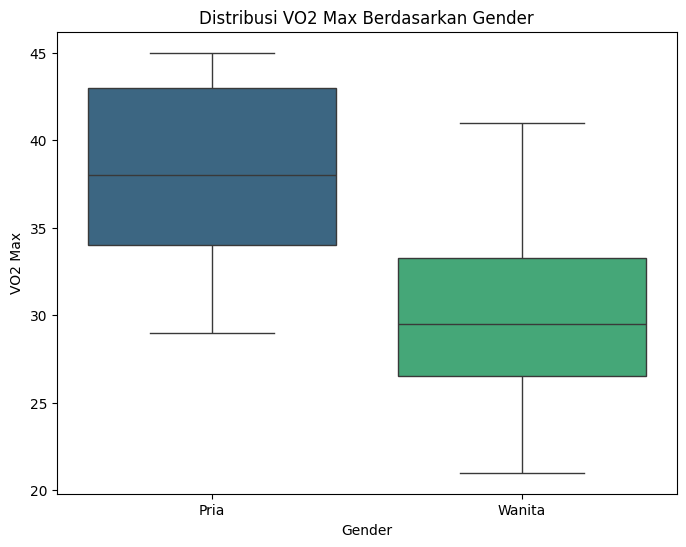

In [7]:
# Visualize VO2 Max berdasarkan gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Vo2 max', data=data, palette='viridis')
plt.title('Distribusi VO2 Max Berdasarkan Gender')
plt.ylabel('VO2 Max')
plt.xlabel('Gender')
plt.show()


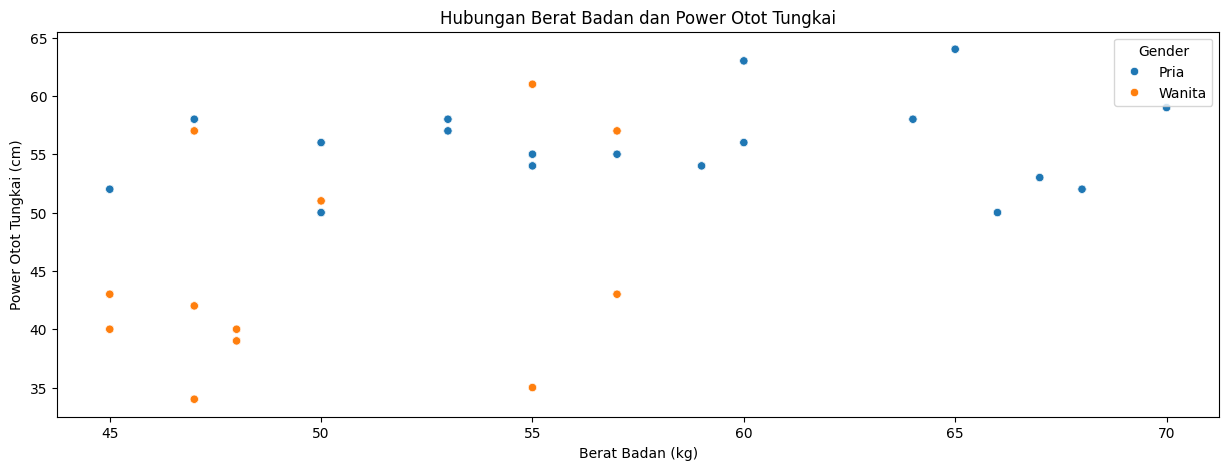

In [8]:
# Scatter plot antara Power Otot Tungkai dan Berat Badan
plt.figure(figsize=(15,5))
sns.scatterplot(x=data['Berat Badan'], y=data['Power Otot Tungkai'], hue=data['Gender'])
plt.xlabel("Berat Badan (kg)")
plt.ylabel("Power Otot Tungkai (cm)")
plt.title("Hubungan Berat Badan dan Power Otot Tungkai")
plt.legend(title="Gender")
plt.show()

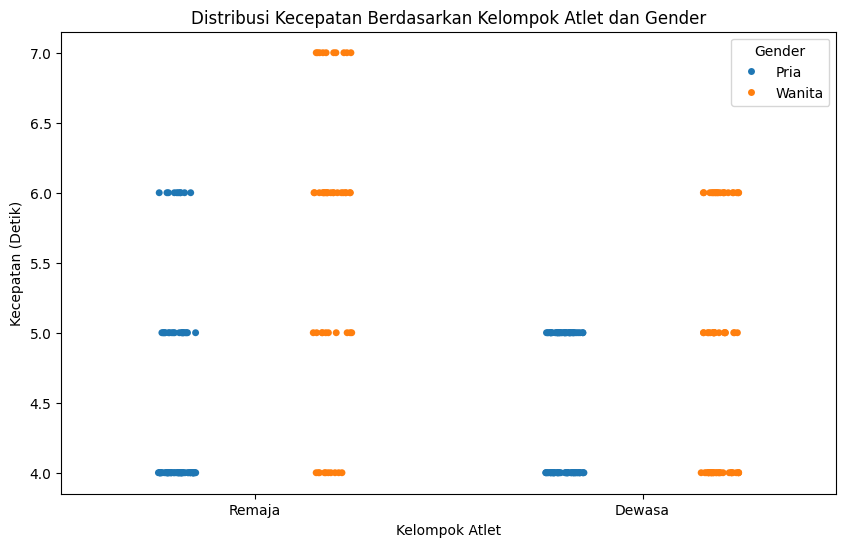

In [9]:
plt.figure(figsize=(10,6))
sns.stripplot(x=data['Kelompok'], y=data['Kecepatan'], hue=data['Gender'], dodge=True, jitter=True)

plt.xlabel("Kelompok Atlet")
plt.ylabel("Kecepatan (Detik)")
plt.title("Distribusi Kecepatan Berdasarkan Kelompok Atlet dan Gender")

plt.legend(title="Gender")
plt.show()

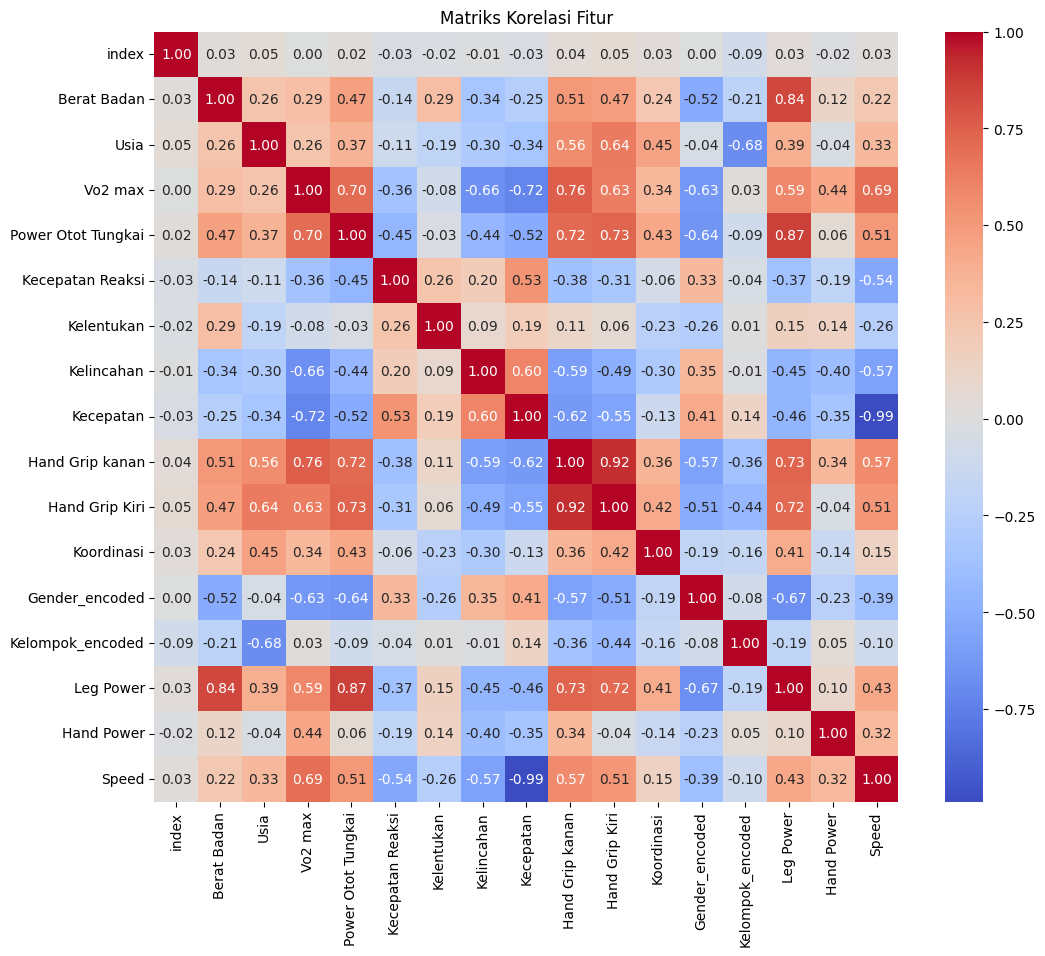

In [10]:
# Membuat heatmap untuk visualisasi korelasi
data_numeric = data.select_dtypes(include=['number'])
correlation_matrix = data_numeric.corr()
# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur')
plt.show()

<ipython-input-11-8c818215b4cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kelompok', data=data, palette='viridis')


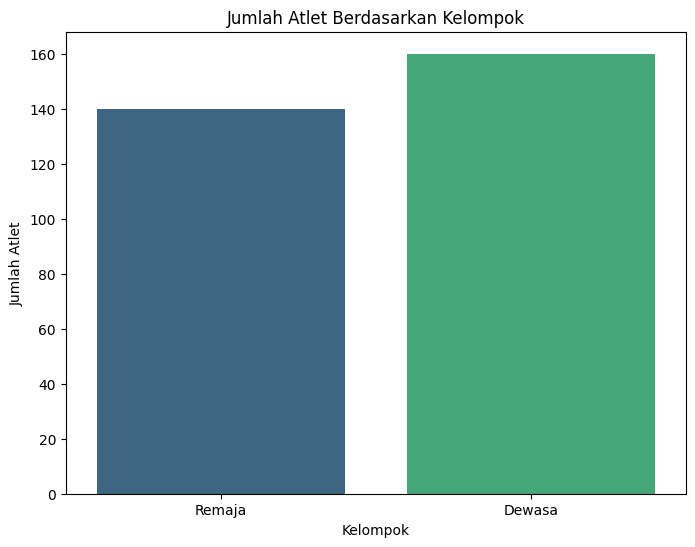

In [11]:
# Visualize Kategori Kelompok
plt.figure(figsize=(8, 6))
sns.countplot(x='Kelompok', data=data, palette='viridis')
plt.title('Jumlah Atlet Berdasarkan Kelompok')
plt.xlabel('Kelompok')
plt.ylabel('Jumlah Atlet')
plt.show()

# **Pembuatan Model**

# Random Forest

In [12]:
#Penentuan norma untuk klasifikasi atlit

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold


# Endurance
def classify_vo2max(row):
    if row['Gender'] == 'Pria':
        if row['Vo2 max'] <= 24:
            return 'Beginner'
        elif 25 <= row['Vo2 max'] <= 36:
            return 'Intermediate'
        elif 37 <= row['Vo2 max'] < 50:
            return 'Advanced'
    elif row['Gender'] == 'Wanita':
        if row['Vo2 max'] <= 22:
            return 'Beginner'
        elif 23 <= row['Vo2 max'] <= 33:
            return 'Intermediate'
        elif 34 <= row['Vo2 max'] < 46:
            return 'Advanced'
    return 'Uncategorized'

data['Endurance Category'] =data.apply(classify_vo2max, axis=1)

# Speed
def classify_speed(row):
    if row['Gender'] == 'Pria':
        if row['Speed'] >= 3.70:
            return 'Beginner'
        elif 3.31 <= row['Speed'] < 3.50:
            return 'Intermediate'
        elif row['Speed'] < 3.11:
            return 'Advanced'
    elif row['Gender'] == 'Wanita':
        if row['Speed'] >= 3.90:
            return 'Beginner'
        elif 3.51 <= row['Speed'] < 3.70:
            return 'Intermediate'
        elif row['Speed'] < 3.50:
            return 'Advanced'
    return 'Uncategorized'

data['Speed Category'] =data.apply(classify_speed, axis=1)

# Leg Power Classification (Estimasi Wanita)
def classify_leg_power(row):
    leg_power = row['Leg Power']

    if row['Gender'] == 'Pria':
        if leg_power >= 79:
            return 'Advanced'
        elif 65 <= leg_power < 79:
            return 'Intermediate'
        else:
            return 'Beginner'

    elif row['Gender'] == 'Wanita':
        if leg_power >= 59:
            return 'Advanced'
        elif 49 <= leg_power < 59:
            return 'Intermediate'
        else:
            return 'Beginner'

data['Leg Power Category'] = data.apply(classify_leg_power, axis=1)

# Hand Power
def classify_handpower(row):
    if row['Gender'] == 'Pria':
        if row['Hand Power'] >= 1.30 or row['Hand Power'] < 0.85:
            return 'Beginner'
        elif 0.85 <= row['Hand Power'] < 1.15:
            return 'Intermediate'
        elif 1.15 <= row['Hand Power'] < 1.30:
            return 'Advanced'
    elif row['Gender'] == 'Wanita':
        if row['Hand Power'] >= 1.25 or row['Hand Power'] < 0.80:
            return 'Beginner'
        elif 0.80 <= row['Hand Power'] < 1.10:
            return 'Intermediate'
        elif 1.10 <= row['Hand Power'] < 1.25:
            return 'Advanced'
    return 'Uncategorized'

data['Hand Power Category'] =data.apply(classify_handpower, axis=1)




In [13]:
# Kombinasi kategori untuk target klasifikasi
data['Overall Category'] =data[['Endurance Category', 'Speed Category','Leg Power Category','Hand Power Category']].mode(axis=1)[0]

# Encoding kategori menjadi numerik
label_encoder = LabelEncoder()
data['Overall Category Encoded'] = label_encoder.fit_transform(data['Overall Category'])

In [14]:
# Feature Selection
features =data[['Leg Power', 'Hand Power','Speed','Vo2 max']]
target =data['Overall Category Encoded']

# Normalisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [15]:
# Menentukan jumlah fold (k) secara otomatis menggunakan sqrt(N)
N = len(features_scaled)
k = min(10, max(2, int(np.sqrt(N))))
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [16]:
# Simpan Hasil Evaluasi untuk Setiap Fold
fold_evaluations = []

for train_index, test_index in kf.split(features_scaled):
    X_train_fold, X_test_fold = features_scaled[train_index], features_scaled[test_index]
    y_train_fold, y_test_fold = target.iloc[train_index], target.iloc[test_index]

    # Latih Model pada Fold Ini
    rf_model_fold = RandomForestClassifier(
        n_estimators=30,
        max_depth=3,
        min_samples_split=30,
        min_samples_leaf=15,
        max_features="sqrt",
        bootstrap=True,
        class_weight='balanced',
        random_state=42
    )

    rf_model_fold.fit(X_train_fold, y_train_fold)
    y_pred_fold = rf_model_fold.predict(X_test_fold)

    # Evaluasi Model pada Fold Ini
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_precision = precision_score(y_test_fold, y_pred_fold, average='weighted', zero_division=1)
    fold_recall = recall_score(y_test_fold, y_pred_fold, average='weighted', zero_division=1)
    fold_f1 = f1_score(y_test_fold, y_pred_fold, average='weighted')

    fold_evaluations.append({
        "Accuracy": fold_accuracy,
        "Precision": fold_precision,
        "Recall": fold_recall,
        "F1-Score": fold_f1
    })

In [17]:
# Hitung Rata-rata Evaluasi dari Semua Fold
average_evaluation = {
    "Mean Accuracy": np.mean([eval["Accuracy"] for eval in fold_evaluations]),
    "Mean Precision": np.mean([eval["Precision"] for eval in fold_evaluations]),
    "Mean Recall": np.mean([eval["Recall"] for eval in fold_evaluations]),
    "Mean F1-Score": np.mean([eval["F1-Score"] for eval in fold_evaluations])
}

In [18]:
# Tampilkan Hasil Evaluasi dengan Basic K-Fold
print("\n**K-Fold Evaluations per Fold:**\n")
for i, eval_metrics in enumerate(fold_evaluations):
    print(f"🔹 Fold {i+1}:")
    print(f"   - Accuracy:  {eval_metrics['Accuracy']:.4f}")
    print(f"   - Precision: {eval_metrics['Precision']:.4f}")
    print(f"   - Recall:    {eval_metrics['Recall']:.4f}")
    print(f"   - F1-Score:  {eval_metrics['F1-Score']:.4f}")
    print("-" * 40)

print("\n**Mean Evaluation Metrics (Averaged Across Folds):**\n")
print(f"✅ Mean Accuracy:  {average_evaluation['Mean Accuracy']:.4f}")
print(f"✅ Mean Precision: {average_evaluation['Mean Precision']:.4f}")
print(f"✅ Mean Recall:    {average_evaluation['Mean Recall']:.4f}")
print(f"✅ Mean F1-Score:  {average_evaluation['Mean F1-Score']:.4f}")


**K-Fold Evaluations per Fold:**

🔹 Fold 1:
   - Accuracy:  0.7333
   - Precision: 0.7465
   - Recall:    0.7333
   - F1-Score:  0.7219
----------------------------------------
🔹 Fold 2:
   - Accuracy:  0.6333
   - Precision: 0.6536
   - Recall:    0.6333
   - F1-Score:  0.6287
----------------------------------------
🔹 Fold 3:
   - Accuracy:  0.9000
   - Precision: 0.9074
   - Recall:    0.9000
   - F1-Score:  0.9023
----------------------------------------
🔹 Fold 4:
   - Accuracy:  0.8000
   - Precision: 0.8480
   - Recall:    0.8000
   - F1-Score:  0.8129
----------------------------------------
🔹 Fold 5:
   - Accuracy:  0.8333
   - Precision: 0.8396
   - Recall:    0.8333
   - F1-Score:  0.8342
----------------------------------------
🔹 Fold 6:
   - Accuracy:  0.8333
   - Precision: 0.8479
   - Recall:    0.8333
   - F1-Score:  0.8311
----------------------------------------
🔹 Fold 7:
   - Accuracy:  0.9000
   - Precision: 0.9083
   - Recall:    0.9000
   - F1-Score:  0.8967
-----

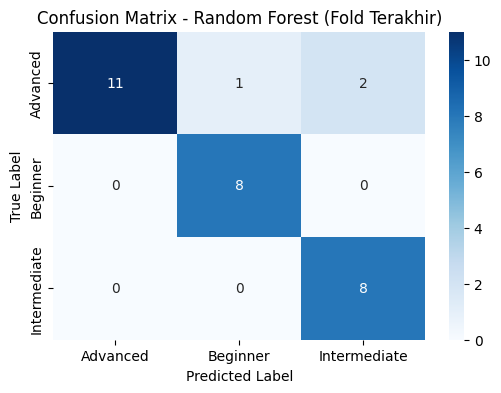

In [19]:
from sklearn.metrics import confusion_matrix

# Buat Confusion Matrix dari fold terakhir
cm = confusion_matrix(y_test_fold, y_pred_fold)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest (Fold Terakhir)")
plt.show()

In [20]:
print("Kelas unik dalam Overall Category:",data["Overall Category"].unique())
print("Kelas unik dalam Overall Category Encoded:",data["Overall Category Encoded"].unique())

Kelas unik dalam Overall Category: ['Beginner' 'Advanced' 'Intermediate']
Kelas unik dalam Overall Category Encoded: [1 0 2]


# Logistik Regresi

In [21]:
from sklearn.linear_model import LogisticRegression
import re

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [22]:
# K-Fold Cross Validation
N = len(data)  # Jumlah total sampel dalam dataset

# Menggunakan aturan sqrt(N) tetapi dibatasi antara 2 hingga 10
k_auto = min(10, max(2, int(np.sqrt(N))))
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [23]:
# Simpan hasil evaluasi untuk setiap fold
fold_evaluations = []

for train_index, test_index in kf.split(features_scaled):
    X_train_fold, X_test_fold = features_scaled[train_index], features_scaled[test_index]
    y_train_fold, y_test_fold = target.iloc[train_index], target.iloc[test_index]

    # Latih model Regresi Logistik Multinomial
    model_fold = LogisticRegression( solver="lbfgs", max_iter=1000)
    model_fold.fit(X_train_fold, y_train_fold)
    y_pred_fold = model_fold.predict(X_test_fold)

    # Evaluasi Model pada Fold Ini
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_precision = precision_score(y_test_fold, y_pred_fold, average='weighted', zero_division=1)
    fold_recall = recall_score(y_test_fold, y_pred_fold, average='weighted', zero_division=1)
    fold_f1 = f1_score(y_test_fold, y_pred_fold, average='weighted')

    fold_evaluations.append({
        "Accuracy": fold_accuracy,
        "Precision": fold_precision,
        "Recall": fold_recall,
        "F1-Score": fold_f1
    })

In [24]:
# Hitung rata-rata evaluasi dari semua fold
average_evaluation = {
    "Mean Accuracy": np.mean([eval["Accuracy"] for eval in fold_evaluations]),
    "Mean Precision": np.mean([eval["Precision"] for eval in fold_evaluations]),
    "Mean Recall": np.mean([eval["Recall"] for eval in fold_evaluations]),
    "Mean F1-Score": np.mean([eval["F1-Score"] for eval in fold_evaluations])
}

In [25]:
# Tampilkan hasil evaluasi dengan Basic K-Fold
evaluation_results = {
    "K-Fold Evaluations per Fold": fold_evaluations,
    "Mean Evaluation Metrics": average_evaluation
}

# Menampilkan hasil evaluasi K-Fold dengan format yang diminta
evaluation_output = "\n**K-Fold Evaluations per Fold:**\n"
for i, eval_metrics in enumerate(fold_evaluations):
    evaluation_output += f"🔹 Fold {i+1}:\n"
    evaluation_output += f"   - Accuracy:  {eval_metrics['Accuracy']:.4f}\n"
    evaluation_output += f"   - Precision: {eval_metrics['Precision']:.4f}\n"
    evaluation_output += f"   - Recall:    {eval_metrics['Recall']:.4f}\n"
    evaluation_output += f"   - F1-Score:  {eval_metrics['F1-Score']:.4f}\n"
    evaluation_output += "-" * 40 + "\n"

evaluation_output += "\n**Mean Evaluation Metrics (Averaged Across Folds):**\n"
evaluation_output += f"✅ Mean Accuracy:  {average_evaluation['Mean Accuracy']:.4f}\n"
evaluation_output += f"✅ Mean Precision: {average_evaluation['Mean Precision']:.4f}\n"
evaluation_output += f"✅ Mean Recall:    {average_evaluation['Mean Recall']:.4f}\n"
evaluation_output += f"✅ Mean F1-Score:  {average_evaluation['Mean F1-Score']:.4f}\n"

# Menampilkan output evaluasi
print(evaluation_output)


**K-Fold Evaluations per Fold:**
🔹 Fold 1:
   - Accuracy:  0.6333
   - Precision: 0.6261
   - Recall:    0.6333
   - F1-Score:  0.6267
----------------------------------------
🔹 Fold 2:
   - Accuracy:  0.5000
   - Precision: 0.4635
   - Recall:    0.5000
   - F1-Score:  0.4679
----------------------------------------
🔹 Fold 3:
   - Accuracy:  0.7000
   - Precision: 0.7246
   - Recall:    0.7000
   - F1-Score:  0.6919
----------------------------------------
🔹 Fold 4:
   - Accuracy:  0.6333
   - Precision: 0.7250
   - Recall:    0.6333
   - F1-Score:  0.6419
----------------------------------------
🔹 Fold 5:
   - Accuracy:  0.6333
   - Precision: 0.6516
   - Recall:    0.6333
   - F1-Score:  0.6234
----------------------------------------
🔹 Fold 6:
   - Accuracy:  0.5667
   - Precision: 0.6044
   - Recall:    0.5667
   - F1-Score:  0.5742
----------------------------------------
🔹 Fold 7:
   - Accuracy:  0.7667
   - Precision: 0.7766
   - Recall:    0.7667
   - F1-Score:  0.7704
------

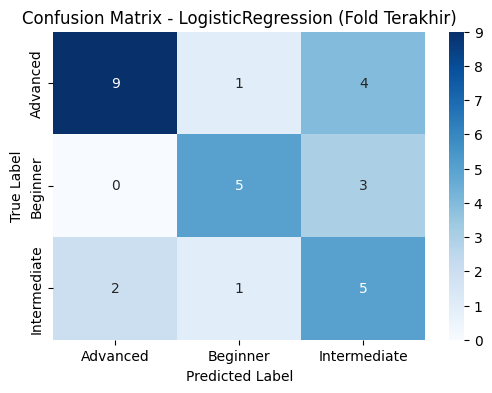

In [26]:
# Buat Confusion Matrix dari fold terakhir
cm = confusion_matrix(y_test_fold, y_pred_fold)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LogisticRegression (Fold Terakhir)")
plt.show()

In [27]:
print("Distribusi VO2 Max Category:\n",data['Endurance Category'].value_counts())
print("\nDistribusi Speed Category:\n",data['Speed Category'].value_counts())
print("\nDistribusi Leg Power Category:\n",data['Leg Power Category'].value_counts())
print("\nDistribusi Hand Power Category:\n",data['Hand Power Category'].value_counts())
print("\nDistribusi Overall Category:\n",data['Overall Category'].value_counts())

Distribusi VO2 Max Category:
 Endurance Category
Intermediate    148
Advanced        142
Beginner         10
Name: count, dtype: int64

Distribusi Speed Category:
 Speed Category
Beginner        240
Advanced         50
Intermediate     10
Name: count, dtype: int64

Distribusi Leg Power Category:
 Leg Power Category
Intermediate    120
Beginner        110
Advanced         70
Name: count, dtype: int64

Distribusi Hand Power Category:
 Hand Power Category
Intermediate    198
Advanced         60
Beginner         42
Name: count, dtype: int64

Distribusi Overall Category:
 Overall Category
Intermediate    118
Advanced        110
Beginner         72
Name: count, dtype: int64


In [28]:
data.head(300)

,index,Gender,Kelompok,Berat Badan,Usia,Vo2 max,Power Otot Tungkai,Kecepatan Reaksi,Kelentukan,Kelincahan,...,Kelompok_encoded,Leg Power,Hand Power,Speed,Endurance Category,Speed Category,Leg Power Category,Hand Power Category,Overall Category,Overall Category Encoded
0,1,Pria,Remaja,50,15,41,50,0.23,31,15,...,1,55.2500,1.650000,5.000000,Advanced,Beginner,Beginner,Beginner,Beginner,1
1,2,Pria,Remaja,53,15,41,58,0.22,21,17,...,1,67.9354,1.258065,4.000000,Advanced,Beginner,Intermediate,Advanced,Advanced,0
2,3,Wanita,Remaja,45,18,27,40,0.30,36,18,...,1,39.7800,0.846154,4.000000,Intermediate,Beginner,Beginner,Intermediate,Beginner,1
3,4,Pria,Remaja,64,15,43,58,0.23,37,17,...,1,82.0352,1.324324,4.000000,Advanced,Beginner,Advanced,Beginner,Advanced,0
4,5,Pria,Remaja,53,18,31,57,0.34,37,20,...,1,66.7641,0.840000,3.333333,Intermediate,Intermediate,Intermediate,Beginner,Intermediate,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,Pria,Dewasa,60,27,44,63,0.23,10,15,...,0,83.5380,1.063830,5.000000,Advanced,Beginner,Advanced,Intermediate,Advanced,0
296,297,Pria,Dewasa,60,18,33,56,0.23,22,17,...,0,74.2560,1.090909,4.000000,Intermediate,Beginner,Intermediate,Intermediate,Intermediate,2
297,298,Pria,Dewasa,55,19,36,54,0.21,27,18,...,0,65.6370,1.021277,5.000000,Intermediate,Beginner,Intermediate,Intermediate,Intermediate,2
298,299,Wanita,Dewasa,47,20,41,57,0.26,1,16,...,0,59.2059,1.083333,5.000000,Advanced,Beginner,Advanced,Intermediate,Advanced,0


# **HYPER PARAMETER TUNNING**

# Logistik Regresi

In [29]:
# Pisahkan fitur dan target
X = data.drop(columns=['index','Gender','Kelompok','Berat Badan','Usia','Power Otot Tungkai',
                       'Kecepatan Reaksi','Kelentukan','Kecepatan','Kelincahan','Hand Grip kanan',
                       'Hand Grip Kiri','Koordinasi','Gender_encoded','Kelompok_encoded',
                       'Endurance Category','Speed Category','Leg Power Category','Hand Power Category',
                       'Overall Category','Overall Category Encoded'])  # Exclude index & target

# Binarisasi target berdasarkan median nilai "Overall Category Encoded"
y = data["Overall Category Encoded"].apply(lambda x: 1 if x > data["Overall Category Encoded"].median() else 0)

In [30]:
# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Definisi hyperparameter tuning untuk Logistic Regression
param_grid = {
    'solver': ['lbfgs', 'saga'],  # Solver yang sesuai untuk L2
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Rentang nilai regularisasi
    'max_iter': [1000, 5000],  # Iterasi lebih tinggi untuk memastikan konvergensi
    'penalty': ['l2']  # Menggunakan regularisasi L2 (Ridge Regression)
}

In [32]:
# Model Logistic Regression dengan class_weight='balanced' untuk menangani ketidakseimbangan data
logistic_model = LogisticRegression(class_weight='balanced')

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(
    estimator=logistic_model, param_grid=param_grid, cv=5,
    scoring='accuracy', n_jobs=-1
)

# Training Grid Search
grid_search.fit(X_scaled, y)

# Model terbaik setelah tuning
best_logistic_model = grid_search.best_estimator_

In [33]:
# Tentukan jumlah fold untuk Stratified K-Fold berdasarkan jumlah data
N = len(X_scaled)
k_auto = min(10, max(2, int(np.sqrt(N))))
kf = StratifiedKFold(n_splits=k_auto, shuffle=True, random_state=42)

In [34]:

# Simpan hasil evaluasi
fold_evaluations = []

for train_index, test_index in kf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Latih model dengan hyperparameter terbaik
    best_logistic_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_logistic_model.predict(X_test_fold)

    # Evaluasi Model pada Fold Ini
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_precision = precision_score(y_test_fold, y_pred_fold, average='weighted', zero_division=1)
    fold_recall = recall_score(y_test_fold, y_pred_fold, average='weighted', zero_division=1)
    fold_f1 = f1_score(y_test_fold, y_pred_fold, average='weighted')

    fold_evaluations.append({
        "Accuracy": fold_accuracy,
        "Precision": fold_precision,
        "Recall": fold_recall,
        "F1-Score": fold_f1
    })





In [35]:

# Hitung rata-rata evaluasi dari semua fold
average_evaluation = {
    "Mean Accuracy": np.mean([eval["Accuracy"] for eval in fold_evaluations]),
    "Mean Precision": np.mean([eval["Precision"] for eval in fold_evaluations]),
    "Mean Recall": np.mean([eval["Recall"] for eval in fold_evaluations]),
    "Mean F1-Score": np.mean([eval["F1-Score"] for eval in fold_evaluations])
}

In [36]:
# Menampilkan hasil evaluasi K-Fold dengan format yang diminta
evaluation_output = "\n**K-Fold Evaluations per Fold:**\n"
for i, eval_metrics in enumerate(fold_evaluations):
    evaluation_output += f"🔹 Fold {i+1}:\n"
    evaluation_output += f"   - Accuracy:  {eval_metrics['Accuracy']:.4f}\n"
    evaluation_output += f"   - Precision: {eval_metrics['Precision']:.4f}\n"
    evaluation_output += f"   - Recall:    {eval_metrics['Recall']:.4f}\n"
    evaluation_output += f"   - F1-Score:  {eval_metrics['F1-Score']:.4f}\n"
    evaluation_output += "-" * 40 + "\n"

evaluation_output += "\n**Mean Evaluation Metrics (Averaged Across Folds):**\n"
evaluation_output += f"✅ Mean Accuracy:  {average_evaluation['Mean Accuracy']:.4f}\n"
evaluation_output += f"✅ Mean Precision: {average_evaluation['Mean Precision']:.4f}\n"
evaluation_output += f"✅ Mean Recall:    {average_evaluation['Mean Recall']:.4f}\n"
evaluation_output += f"✅ Mean F1-Score:  {average_evaluation['Mean F1-Score']:.4f}\n"

# Menampilkan output evaluasi
print(evaluation_output)


**K-Fold Evaluations per Fold:**
🔹 Fold 1:
   - Accuracy:  0.8000
   - Precision: 0.8127
   - Recall:    0.8000
   - F1-Score:  0.8028
----------------------------------------
🔹 Fold 2:
   - Accuracy:  0.8000
   - Precision: 0.8127
   - Recall:    0.8000
   - F1-Score:  0.8028
----------------------------------------
🔹 Fold 3:
   - Accuracy:  0.7667
   - Precision: 0.7867
   - Recall:    0.7667
   - F1-Score:  0.7690
----------------------------------------
🔹 Fold 4:
   - Accuracy:  0.6667
   - Precision: 0.6786
   - Recall:    0.6667
   - F1-Score:  0.6697
----------------------------------------
🔹 Fold 5:
   - Accuracy:  0.5000
   - Precision: 0.5200
   - Recall:    0.5000
   - F1-Score:  0.5051
----------------------------------------
🔹 Fold 6:
   - Accuracy:  0.7000
   - Precision: 0.7430
   - Recall:    0.7000
   - F1-Score:  0.7017
----------------------------------------
🔹 Fold 7:
   - Accuracy:  0.7667
   - Precision: 0.7710
   - Recall:    0.7667
   - F1-Score:  0.7680
------

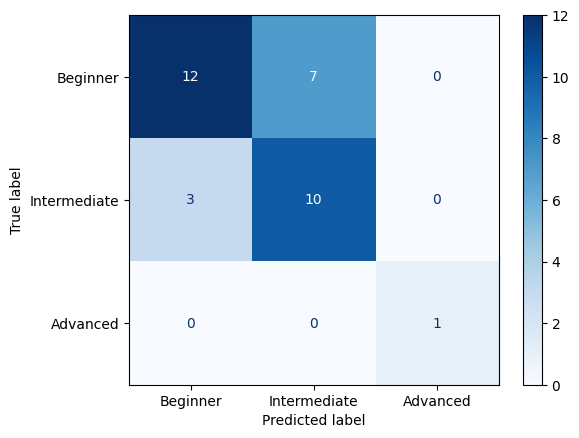

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Pastikan ada setidaknya satu contoh dari setiap kelas
all_labels = np.array([0, 1, 2])  # 0=Beginner, 1=Intermediate, 2=Advanced
y_test_extended = np.concatenate([y_test_fold, all_labels])  # Tambahkan satu contoh dari setiap label
y_pred_extended = np.concatenate([y_pred_fold, all_labels])  # Pastikan prediksi juga mencakup semua label

# Buat ulang confusion matrix dengan label lengkap
cm = confusion_matrix(y_test_extended, y_pred_extended, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Beginner', 'Intermediate', 'Advanced'])
disp.plot(cmap="Blues", values_format='d')

# Random Forest

In [38]:
# Menentukan jumlah fold (k) secara otomatis menggunakan sqrt(N)
N = len(features_scaled)
k = min(10, max(2, int(np.sqrt(N))))
kf = KFold(n_splits=k, shuffle=True, random_state=42)
# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(features_scaled, target)

# Model terbaik setelah tuning
best_rf_model = grid_search.best_estimator_

# Simpan Hasil Evaluasi untuk Setiap Fold
fold_evaluations = []

for train_index, test_index in kf.split(features_scaled, target):
    X_train_fold, X_test_fold = features_scaled[train_index], features_scaled[test_index]
    y_train_fold, y_test_fold = target.iloc[train_index], target.iloc[test_index]

    # Latih Model dengan Hyperparameter Terbaik
    best_rf_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_rf_model.predict(X_test_fold)

    # Evaluasi Model pada Fold Ini
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_precision = precision_score(y_test_fold, y_pred_fold, average='weighted', zero_division=1)
    fold_recall = recall_score(y_test_fold, y_pred_fold, average='weighted', zero_division=1)
    fold_f1 = f1_score(y_test_fold, y_pred_fold, average='weighted')

    fold_evaluations.append({
        "Accuracy": fold_accuracy,
        "Precision": fold_precision,
        "Recall": fold_recall,
        "F1-Score": fold_f1
    })

    # Hitung Rata-rata Evaluasi dari Semua Fold
average_evaluation = {
    "Mean Accuracy": np.mean([eval["Accuracy"] for eval in fold_evaluations]),
    "Mean Precision": np.mean([eval["Precision"] for eval in fold_evaluations]),
    "Mean Recall": np.mean([eval["Recall"] for eval in fold_evaluations]),
    "Mean F1-Score": np.mean([eval["F1-Score"] for eval in fold_evaluations])
}

# Tampilkan Hasil Evaluasi dengan Basic K-Fold
print("\n**K-Fold Evaluations per Fold:**\n")
for i, eval_metrics in enumerate(fold_evaluations):
    print(f"🔹 Fold {i+1}:")
    print(f"   - Accuracy:  {eval_metrics['Accuracy']:.4f}")
    print(f"   - Precision: {eval_metrics['Precision']:.4f}")
    print(f"   - Recall:    {eval_metrics['Recall']:.4f}")
    print(f"   - F1-Score:  {eval_metrics['F1-Score']:.4f}")
    print("-" * 40)

print("\n**Mean Evaluation Metrics (Averaged Across Folds):**\n")
print(f"✅ Mean Accuracy:  {average_evaluation['Mean Accuracy']:.4f}")
print(f"✅ Mean Precision: {average_evaluation['Mean Precision']:.4f}")
print(f"✅ Mean Recall:    {average_evaluation['Mean Recall']:.4f}")
print(f"✅ Mean F1-Score:  {average_evaluation['Mean F1-Score']:.4f}")


**K-Fold Evaluations per Fold:**

🔹 Fold 1:
   - Accuracy:  0.9667
   - Precision: 0.9694
   - Recall:    0.9667
   - F1-Score:  0.9665
----------------------------------------
🔹 Fold 2:
   - Accuracy:  0.9667
   - Precision: 0.9694
   - Recall:    0.9667
   - F1-Score:  0.9665
----------------------------------------
🔹 Fold 3:
   - Accuracy:  0.9667
   - Precision: 0.9704
   - Recall:    0.9667
   - F1-Score:  0.9667
----------------------------------------
🔹 Fold 4:
   - Accuracy:  0.9667
   - Precision: 0.9700
   - Recall:    0.9667
   - F1-Score:  0.9671
----------------------------------------
🔹 Fold 5:
   - Accuracy:  0.9333
   - Precision: 0.9444
   - Recall:    0.9333
   - F1-Score:  0.9340
----------------------------------------
🔹 Fold 6:
   - Accuracy:  1.0000
   - Precision: 1.0000
   - Recall:    1.0000
   - F1-Score:  1.0000
----------------------------------------
🔹 Fold 7:
   - Accuracy:  1.0000
   - Precision: 1.0000
   - Recall:    1.0000
   - F1-Score:  1.0000
-----

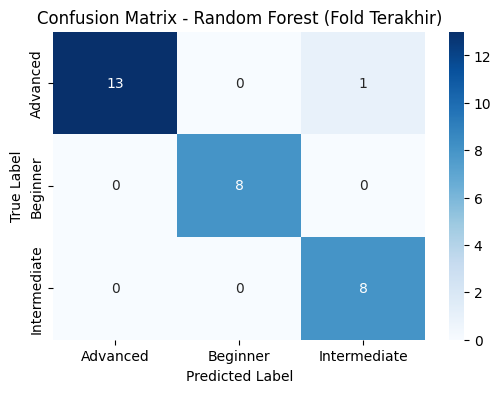

In [39]:
# Buat Confusion Matrix dari fold terakhir
cm = confusion_matrix(y_test_fold, y_pred_fold)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest (Fold Terakhir)")
plt.show()